### ⭐ LightGBM 모델링 전체 코드
(코드 후에 모델 꺼내기 수행)

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

# 한글 글꼴체 변경
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() 이런거 했을 때, 컬럼이 생략되지 않고, 모든 컬럼 뜨게
pd.set_option('display.max_columns', None)
# 지수 표기법 대신에 소수점으로 표시하는코드
pd.options.display.float_format = '{:.5f}'.format
# 값 길이 제한 X
pd.set_option('display.max_colwidth', None) # 값 길이 제한 없음

In [4]:
df = pd.read_csv("data/full_data/TPS_cancel_data_Final.csv")

In [5]:
df

,sha2_hash,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,p_mt,churn
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 12개월이상,Y,0.00000,3개월내없음,N,10.00000,HD,13,I/B,N,12개월~24개월미만,733,3.00000,N,N,2,N
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,6.72000,일주일내,N,0.00000,HD,12,I/B,Y,24개월~ 36개월미만,764,3.00000,N,Y,3,N
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,9.86000,3주일전,N,10.00000,HD,11,I/B,N,24개월~ 36개월미만,794,3.00000,N,N,4,N
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,5.95000,4주일전,N,10.00000,HD,10,I/B,N,24개월~ 36개월미만,825,3.00000,N,N,5,N
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 6~9개월,Y,4.03000,일주일내,N,0.00000,HD,9,I/B,N,24개월~ 36개월미만,855,3.00000,N,N,6,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483374,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,2.03000,일주일내,N,10.00000,HD,-40,현장경로,N,36개월 이상,2338,1.00000,N,N,8,N
21483375,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,2.91000,일주일내,N,10.00000,HD,-41,현장경로,N,36개월 이상,2368,1.00000,N,N,9,N
21483376,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,1.97000,2주일전,N,10.00000,HD,-42,현장경로,N,36개월 이상,2399,1.00000,N,Y,10,N
21483377,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,0.00000,3개월내없음,N,0.00000,HD,-43,현장경로,N,36개월 이상,2429,1.00000,N,N,11,N


In [6]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler

# -----------------------------------------------------------
# 1️⃣ 데이터 분할 (p_mt 기준)
# -----------------------------------------------------------
train = df[df['p_mt'].isin([2,3,4,5,6,7,8,9])].drop(columns=['sha2_hash', 'p_mt'])
val = df[df['p_mt'] == 10].drop(columns=['sha2_hash', 'p_mt'])
test = df[df['p_mt'] == 11].drop(columns=['sha2_hash', 'p_mt'])

# -----------------------------------------------------------
# 2️⃣ 랜덤 언더샘플링 적용 (Train 데이터만)
# -----------------------------------------------------------
X = train.drop(columns=['churn'])
y = train['churn']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 샘플링 후 데이터 병합
y_resampled = pd.Series(y_resampled, name='churn')
train = pd.concat([X_resampled, y_resampled], axis=1)

# 샘플링 후 데이터 분포 확인
print("✅ 랜덤 언더샘플링 완료!")
print(y_resampled.value_counts())

# -----------------------------------------------------------
# 3️⃣ INHOME_RATE 컬럼을 object(string) 타입으로 변환
# -----------------------------------------------------------
train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
val['INHOME_RATE'] = val['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)

print(f"train INHOME_RATE dtype: {train['INHOME_RATE'].dtype}")
print(f"val INHOME_RATE dtype: {val['INHOME_RATE'].dtype}")
print(f"test INHOME_RATE dtype: {test['INHOME_RATE'].dtype}")

# -----------------------------------------------------------
# 4️⃣ 레이블 인코딩 (범주형 변수)
# -----------------------------------------------------------
train_val_test = pd.concat([train, val, test])

categorical_cols = train_val_test.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train_val_test[col] = le.fit_transform(train_val_test[col])
    label_encoders[col] = le

# 인코딩 후 다시 train, val, test로 분리
train = train_val_test.iloc[:len(train)].reset_index(drop=True)
val = train_val_test.iloc[len(train):len(train) + len(val)].reset_index(drop=True)
test = train_val_test.iloc[len(train) + len(val):].reset_index(drop=True)

print("✅ 레이블 인코딩 완료!")

# 레이블 인코딩 매핑 출력
for col, le in label_encoders.items():
    print(f"🔹 {col} 레이블 인코딩 매핑:")
    print(dict(zip(le.classes_, le.transform(le.classes_))))
    print("-" * 30)

# -----------------------------------------------------------
# 5️⃣ 데이터 스케일링 (RobustScaler + MinMaxScaler)
# -----------------------------------------------------------
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'MONTHS_REMAINING']  # RobustScaler 적용
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # 나머지는 MinMaxScaler 적용

# 스케일러 생성
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler 적용
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
val[robust_columns] = robust_scaler.transform(val[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler 적용
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
val[minmax_columns] = minmax_scaler.transform(val[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

print("✅ Robust & MinMax Scaling 완료!")

# -------------------------------------------------------------------------------------------------
# 모델 학습

from lightgbm import LGBMClassifier

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# LightGBM 모델 생성
lgbm_model = LGBMClassifier(
    n_estimators= 52,
    max_depth = 31,
    learning_rate=0.06162796790008785,
    num_leaves = 44,
    min_child_samples = 125,
    subsample = 0.8450232368747989,
    colsample_bytree = 0.6016815309534599,
    lambda_l1 = 2.8300118312412064,
    lambda_l2 = 9.81537138062259,
    random_state=42 
)

# 모델 학습
lgbm_model.fit(X_train, y_train)

✅ 랜덤 언더샘플링 완료!
churn
N    105706
Y    105706
Name: count, dtype: int64
train INHOME_RATE dtype: object
val INHOME_RATE dtype: object
test INHOME_RATE dtype: object
✅ 레이블 인코딩 완료!
🔹 AGE_GRP10 레이블 인코딩 매핑:
{'10대': 0, '20대': 1, '30대': 2, '40대': 3, '50대': 4, '60대': 5, '70대': 6, '80대': 7, '90대이상': 8, '연령없음': 9}
------------------------------
🔹 AGMT_END_SEG 레이블 인코딩 매핑:
{'약정만료 1개월': 0, '약정만료전 12개월이상': 1, '약정만료전 1~2개월': 2, '약정만료전 1개월': 3, '약정만료전 2~3개월': 4, '약정만료전 3~6개월': 5, '약정만료전 6~9개월': 6, '약정만료전 9~12개월': 7, '약정만료후 12개월이상': 8, '약정만료후 1개월~2개월': 9, '약정만료후 2개월~3개월': 10, '약정만료후 3~6개월': 11, '약정만료후 6~9개월': 12, '약정만료후 9~12개월': 13}
------------------------------
🔹 BUNDLE_YN 레이블 인코딩 매핑:
{'N': 0, 'Y': 1}
------------------------------
🔹 CH_LAST_DAYS_BF_GRP 레이블 인코딩 매핑:
{'2주일전': 0, '3개월내없음': 1, '3주일전': 2, '4주일전': 3, '일주일내': 4, '일주일전': 5}
------------------------------
🔹 CONTENT_USE_YN 레이블 인코딩 매핑:
{'N': 0, 'Y': 1}
------------------------------
🔹 INHOME_RATE 레이블 인코딩 매핑:
{'0.0': 0, '10.0': 1, '100.0': 2, '2

LGBMClassifier(colsample_bytree=0.6016815309534599,
               lambda_l1=2.8300118312412064, lambda_l2=9.81537138062259,
               learning_rate=0.06162796790008785, max_depth=31,
               min_child_samples=125, n_estimators=52, num_leaves=44,
               random_state=42, subsample=0.8450232368747989)

In [7]:
display(train, test)

,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,churn
0,0.50000,0.07692,1.00000,0.52131,0.80000,0.00000,0.40000,0.00000,0.28070,0.11111,0.00000,0.50000,0.08521,0.40000,0.00000,0.00000,0
1,0.12500,0.61538,1.00000,1.27213,0.80000,1.00000,0.60000,0.50000,-0.71930,0.44444,0.00000,0.75000,-0.15840,0.20000,0.00000,0.00000,0
2,0.50000,0.07692,0.00000,1.24098,0.80000,0.00000,0.70000,0.00000,0.47368,0.00000,0.00000,0.75000,0.21754,0.20000,0.00000,0.00000,0
3,0.37500,0.07692,1.00000,-0.10164,0.80000,0.00000,0.10000,0.00000,0.33333,0.44444,0.00000,0.50000,0.58396,0.20000,0.00000,0.00000,0
4,0.87500,0.07692,1.00000,-0.39016,0.40000,0.00000,0.00000,0.00000,0.31579,0.11111,0.00000,0.00000,0.64411,0.40000,0.00000,1.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211407,0.50000,0.07692,1.00000,-0.13279,0.80000,0.00000,0.00000,0.00000,0.50877,0.44444,1.00000,0.50000,0.53634,0.20000,0.00000,0.00000,1
211408,0.12500,0.07692,1.00000,-0.44426,0.20000,0.00000,0.00000,0.00000,0.33333,0.11111,1.00000,0.00000,-1.07318,0.20000,0.00000,0.00000,1
211409,0.37500,0.07692,1.00000,0.12787,0.80000,1.00000,0.00000,0.50000,0.61404,1.00000,1.00000,1.00000,-1.31880,0.20000,0.00000,1.00000,1
211410,0.37500,0.07692,0.00000,-0.34262,1.00000,0.00000,0.00000,0.00000,0.49123,1.00000,0.00000,0.75000,-1.20852,0.00000,0.00000,0.00000,1


,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,churn
0,0.50000,0.07692,1.00000,0.57705,0.80000,0.00000,0.30000,0.00000,0.56140,0.00000,0.00000,0.25000,-0.81905,0.40000,0.00000,0.00000,0
1,0.37500,0.46154,1.00000,2.07541,0.80000,0.00000,0.80000,0.00000,0.10526,0.00000,0.00000,0.25000,0.88221,0.20000,0.00000,0.00000,0
2,0.50000,0.07692,1.00000,-0.20328,0.80000,0.00000,0.10000,0.00000,0.33333,0.44444,0.00000,0.50000,-0.00050,1.00000,0.00000,0.00000,0
3,0.50000,1.00000,0.00000,-0.09016,0.80000,0.00000,0.10000,0.00000,-0.19298,0.44444,0.00000,0.50000,-0.32732,0.40000,0.00000,0.00000,0
4,0.37500,0.61538,1.00000,-0.17541,0.80000,0.00000,0.00000,0.00000,-0.91228,1.00000,0.00000,0.50000,0.67018,0.60000,0.00000,1.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945587,0.37500,0.61538,0.00000,-0.44426,0.20000,0.00000,0.00000,0.00000,-0.85965,1.00000,0.00000,0.50000,0.47970,0.20000,0.00000,0.00000,0
1945588,0.25000,0.61538,1.00000,-0.14754,0.80000,0.00000,0.10000,0.00000,-0.70175,0.11111,0.00000,0.50000,-0.18095,0.40000,0.00000,0.00000,0
1945589,0.12500,0.61538,0.00000,-0.16721,0.80000,0.00000,0.00000,0.00000,-1.92982,0.44444,0.00000,0.00000,0.65965,0.20000,0.00000,0.00000,0
1945590,0.37500,0.07692,1.00000,0.11148,0.80000,0.00000,0.30000,0.50000,0.31579,0.00000,0.00000,0.50000,-0.54637,0.20000,0.00000,0.00000,0


Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932416
           1       0.03      0.74      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.77      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (테스트 데이터):
[[1557375  375041]
 [   3414    9762]]


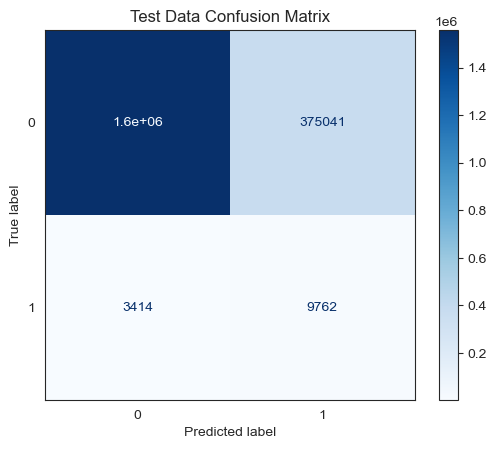

Test AUC-ROC: 0.85


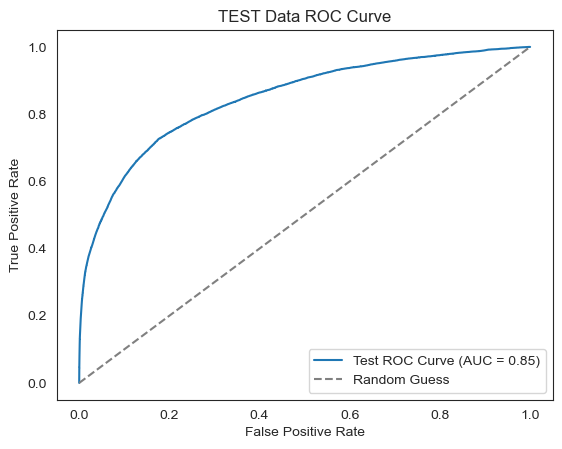

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = lgbm_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=lgbm_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = lgbm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

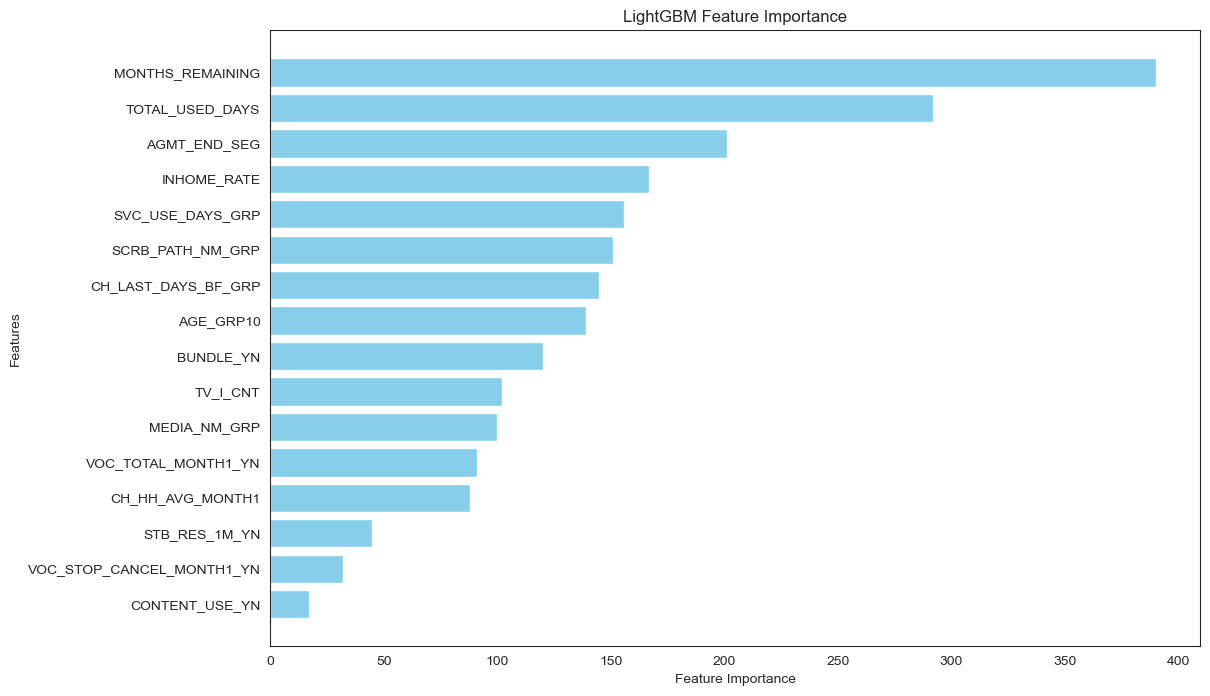

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance 추출
feature_importance = lgbm_model.feature_importances_

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

### 레이블 인코딩 상태

##### 📌 컬럼: AGE_GRP10 <br>
###### '10대': `0`, '20대': `1`, '30대': `2`, '40대': `3`, '50대': `4`, '60대': `5`, '70대': `6`, '80대': `7`, '90대이상': `8`, '연령없음': `9`
--------------------------------------------------
##### 📌 컬럼: AGMT_END_SEG 
###### '약정만료 1개월': `0`, '약정만료전 12개월이상': `1`, '약정만료전 1~2개월': `2`, '약정만료전 1개월': `3`, '약정만료전 2~3개월': `4`, '약정만료전 3~6개월': `5`,<br><br> '약정만료전 6~9개월': `6`, '약정만료전 9~12개월': `7`, '약정만료후 12개월이상': `8`, '약정만료후 1개월~2개월': `9`, '약정만료후 2개월~3개월': `10`, <br><br>'약정만료후 3~6개월': `11`, '약정만료후 6~9개월': `12`, '약정만료후 9~12개월': `13`
--------------------------------------------------
##### 📌 컬럼: BUNDLE_YN
###### N: `0`, Y: `1`
--------------------------------------------------
##### 📌 컬럼: CH_LAST_DAYS_BF_GRP 
###### '2주일전': `0`, '3개월내없음': `1`, '3주일전': `2`, '4주일전': `3`, '일주일내': `4`, '일주일전': `5`
--------------------------------------------------
##### 📌 컬럼: CONTENT_USE_YN
###### N: `0`, Y: `1`
--------------------------------------------------
##### 📌 컬럼: INHOME_RATE
###### '0.0': `0`, '10.0': `1`, '100.0': `2`, '20.0': `3`, '30.0': `4`, '40.0': `5`, '50.0': `6`, '60.0': `7`, '70.0': `8`, '80.0': `9`, '90.0': `10`
--------------------------------------------------
##### 📌 컬럼: MEDIA_NM_GRP
###### 'HD': `0`, 'UHD': `1`, '기타': `2`
--------------------------------------------------
##### 📌 컬럼: SCRB_PATH_NM_GRP 
###### 'I/B': `0`, 'O/B': `1`, '기타': `2`, '렌탈제휴': `3`, '일반상담': `4`, '임직원': `5`, '전략채널': `6`, '정보없음': `7`, '직영몰': `8`, '현장경로': `9`
--------------------------------------------------
##### 📌 컬럼: STB_RES_1M_YN 
###### N: `0`, Y: `1`
--------------------------------------------------
##### 📌 컬럼: SVC_USE_DAYS_GRP
###### '12개월~24개월미만': `0`, '24개월~ 36개월미만': `1`, '36개월 이상': `2`, '6개월~12개월미만': `3`, '6개월미만': `4`
--------------------------------------------------
##### 📌 컬럼: VOC_STOP_CANCEL_MONTH1_YN
###### N: `0`, Y: `1`
--------------------------------------------------
##### 📌 컬럼: VOC_TOTAL_MONTH1_YN
###### N: `0`, Y: `1`
--------------------------------------------------
##### 📌 컬럼: churn(타겟 변수)
###### N: `0`, Y: `1`
--------------------------------------------------

### ✅ 모델 꺼내기

In [7]:
import joblib

joblib.dump(lgbm_model, 'data/file_pkl/lightgbm_model.pkl')
print("Model 저장")

# 스케일러 저장
joblib.dump(robust_scaler, 'data/file_pkl/robust_scaler.pkl')
joblib.dump(minmax_scaler, 'data/file_pkl/minmax_scaler.pkl')

Model 저장


['data/file_pkl/minmax_scaler.pkl']

### 🧰 모델 불러오기

In [9]:
import joblib
model_path = 'data/file_pkl/lightgbm_model.pkl'
loaded_model = joblib.load(model_path)
# 스케일러 불러오기
robust_scaler = joblib.load('data/file_pkl/robust_scaler.pkl')
minmax_scaler = joblib.load('data/file_pkl/minmax_scaler.pkl')

In [9]:
df_real = pd.read_csv('data/full_data/TPS_cancel_data_Final.csv')

In [10]:
df = df_real.copy()

In [11]:
df

,sha2_hash,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,p_mt,churn
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 12개월이상,Y,0.00000,3개월내없음,N,10.00000,HD,13,I/B,N,12개월~24개월미만,733,3.00000,N,N,2,N
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,6.72000,일주일내,N,0.00000,HD,12,I/B,Y,24개월~ 36개월미만,764,3.00000,N,Y,3,N
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,9.86000,3주일전,N,10.00000,HD,11,I/B,N,24개월~ 36개월미만,794,3.00000,N,N,4,N
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,5.95000,4주일전,N,10.00000,HD,10,I/B,N,24개월~ 36개월미만,825,3.00000,N,N,5,N
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 6~9개월,Y,4.03000,일주일내,N,0.00000,HD,9,I/B,N,24개월~ 36개월미만,855,3.00000,N,N,6,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483374,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,2.03000,일주일내,N,10.00000,HD,-40,현장경로,N,36개월 이상,2338,1.00000,N,N,8,N
21483375,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,2.91000,일주일내,N,10.00000,HD,-41,현장경로,N,36개월 이상,2368,1.00000,N,N,9,N
21483376,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,1.97000,2주일전,N,10.00000,HD,-42,현장경로,N,36개월 이상,2399,1.00000,N,Y,10,N
21483377,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,0.00000,3개월내없음,N,0.00000,HD,-43,현장경로,N,36개월 이상,2429,1.00000,N,N,11,N


In [12]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder

train = df[df['p_mt'].isin([2,3,4,5,6,7,8,9])].drop(columns=['sha2_hash', 'p_mt'])
val = df[df['p_mt'] == 10].drop(columns=['sha2_hash', 'p_mt'])
test = df[df['p_mt'] == 11].drop(columns=['sha2_hash', 'p_mt'])

# INHOME_RATE 컬럼을 object(string) 타입으로 변환
train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
val['INHOME_RATE'] = val['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)

print(f"train INHOME_RATE dtype: {train['INHOME_RATE'].dtype}")
print(f"val INHOME_RATE dtype: {val['INHOME_RATE'].dtype}")
print(f"test INHOME_RATE dtype: {test['INHOME_RATE'].dtype}")

# ✅ train, val, test를 합쳐서 동일한 인코딩 적용
train_val_test = pd.concat([train, val, test])

categorical_cols = train_val_test.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train_val_test[col] = le.fit_transform(train_val_test[col])  # 동일한 인코딩 적용
    label_encoders[col] = le  # 나중에 test에도 동일한 인코딩 적용할 수 있도록 저장

# ✅ 다시 train, val, test로 분리
train = train_val_test.iloc[:len(train)].reset_index(drop=True)
val = train_val_test.iloc[len(train):len(train) + len(val)].reset_index(drop=True)
test = train_val_test.iloc[len(train) + len(val):].reset_index(drop=True)

print("✅ 레이블 인코딩 완료!")

# 레이블 인코딩 매핑 출력
for col, le in label_encoders.items():
    print(f"🔹 {col} 레이블 인코딩 매핑:")
    print(dict(zip(le.classes_, le.transform(le.classes_))))
    print("-" * 30)


# ---------------------------------------------------------------------------------------------
# ✅ 불러온 스케일러 적용
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'MONTHS_REMAINING']  # RobustScaler 적용 대상
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # 나머지는 MinMaxScaler 적용

# ✅ test 데이터에 스케일링 적용
test[robust_columns] = robust_scaler.transform(test[robust_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

train INHOME_RATE dtype: object
val INHOME_RATE dtype: object
test INHOME_RATE dtype: object
✅ 레이블 인코딩 완료!
🔹 AGE_GRP10 레이블 인코딩 매핑:
{'10대': 0, '20대': 1, '30대': 2, '40대': 3, '50대': 4, '60대': 5, '70대': 6, '80대': 7, '90대이상': 8, '연령없음': 9}
------------------------------
🔹 AGMT_END_SEG 레이블 인코딩 매핑:
{'약정만료 1개월': 0, '약정만료전 12개월이상': 1, '약정만료전 1~2개월': 2, '약정만료전 1개월': 3, '약정만료전 2~3개월': 4, '약정만료전 3~6개월': 5, '약정만료전 6~9개월': 6, '약정만료전 9~12개월': 7, '약정만료후 12개월이상': 8, '약정만료후 1개월~2개월': 9, '약정만료후 2개월~3개월': 10, '약정만료후 3~6개월': 11, '약정만료후 6~9개월': 12, '약정만료후 9~12개월': 13}
------------------------------
🔹 BUNDLE_YN 레이블 인코딩 매핑:
{'N': 0, 'Y': 1}
------------------------------
🔹 CH_LAST_DAYS_BF_GRP 레이블 인코딩 매핑:
{'2주일전': 0, '3개월내없음': 1, '3주일전': 2, '4주일전': 3, '일주일내': 4, '일주일전': 5}
------------------------------
🔹 CONTENT_USE_YN 레이블 인코딩 매핑:
{'N': 0, 'Y': 1}
------------------------------
🔹 INHOME_RATE 레이블 인코딩 매핑:
{'0.0': 0, '10.0': 1, '100.0': 2, '20.0': 3, '30.0': 4, '40.0': 5, '50.0': 6, '60.0': 7, '70.0': 8, '80.0':

In [13]:
display(test)

,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,churn
0,0.50000,0.07692,1.00000,0.57705,0.80000,0.00000,0.30000,0.00000,0.56140,0.00000,0.00000,0.25000,-0.81905,0.40000,0.00000,0.00000,0
1,0.37500,0.46154,1.00000,2.07541,0.80000,0.00000,0.80000,0.00000,0.10526,0.00000,0.00000,0.25000,0.88221,0.20000,0.00000,0.00000,0
2,0.50000,0.07692,1.00000,-0.20328,0.80000,0.00000,0.10000,0.00000,0.33333,0.44444,0.00000,0.50000,-0.00050,1.00000,0.00000,0.00000,0
3,0.50000,1.00000,0.00000,-0.09016,0.80000,0.00000,0.10000,0.00000,-0.19298,0.44444,0.00000,0.50000,-0.32732,0.40000,0.00000,0.00000,0
4,0.37500,0.61538,1.00000,-0.17541,0.80000,0.00000,0.00000,0.00000,-0.91228,1.00000,0.00000,0.50000,0.67018,0.60000,0.00000,1.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945587,0.37500,0.61538,0.00000,-0.44426,0.20000,0.00000,0.00000,0.00000,-0.85965,1.00000,0.00000,0.50000,0.47970,0.20000,0.00000,0.00000,0
1945588,0.25000,0.61538,1.00000,-0.14754,0.80000,0.00000,0.10000,0.00000,-0.70175,0.11111,0.00000,0.50000,-0.18095,0.40000,0.00000,0.00000,0
1945589,0.12500,0.61538,0.00000,-0.16721,0.80000,0.00000,0.00000,0.00000,-1.92982,0.44444,0.00000,0.00000,0.65965,0.20000,0.00000,0.00000,0
1945590,0.37500,0.07692,1.00000,0.11148,0.80000,0.00000,0.30000,0.50000,0.31579,0.00000,0.00000,0.50000,-0.54637,0.20000,0.00000,0.00000,0


In [14]:
# ✅ 독립 변수(X) 분리 (모델 입력값)
X_test = test.drop(columns=['churn'])  # 'churn' 컬럼이 있을 경우 제거 (실제 test에서는 없음)

# ✅ 불러온 LightGBM 모델을 사용하여 예측 수행
test_predictions = loaded_model.predict(X_test)  # 예측 결과 (0 또는 1)

# ✅ 예측 확률도 확인 (ROC-AUC 계산 시 활용 가능)
test_probabilities = loaded_model.predict_proba(X_test)[:, 1]  # 해지 확률 (1에 대한 확률)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

if 'churn' in test.columns:
    y_test = test['churn']

    # ✅ 혼동 행렬 계산
    cm = confusion_matrix(y_test, test_predictions)
    print("Confusion Matrix:\n", cm)

    # ✅ F1-Score, Accuracy 등 평가
    print("\nClassification Report:")
    print(classification_report(y_test, test_predictions))

    # ✅ ROC-AUC 계산
    roc_auc = roc_auc_score(y_test, test_probabilities)
    print(f"\nTest ROC-AUC Score: {roc_auc:.4f}")


Confusion Matrix:
 [[1557375  375041]
 [   3414    9762]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932416
           1       0.03      0.74      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.77      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Test ROC-AUC Score: 0.8474


동일하게 나왔다!

### ⭐ Shap 분석 진행

In [2]:
os.chdir("C:\workspaces\LGHV_Project\src")

In [3]:
df_test = pd.read_csv("data/full_data/TPS_cancel_data_Final.csv")

In [4]:
df = df_test.copy()

In [5]:
df['INHOME_RATE'] = df['INHOME_RATE'].astype(str)

print(f"df INHOME_RATE dtype: {df['INHOME_RATE'].dtype}")

df INHOME_RATE dtype: object


In [6]:
df

,sha2_hash,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,p_mt,churn
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 12개월이상,Y,0.00000,3개월내없음,N,10.0,HD,13,I/B,N,12개월~24개월미만,733,3.00000,N,N,2,N
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,6.72000,일주일내,N,0.0,HD,12,I/B,Y,24개월~ 36개월미만,764,3.00000,N,Y,3,N
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,9.86000,3주일전,N,10.0,HD,11,I/B,N,24개월~ 36개월미만,794,3.00000,N,N,4,N
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,5.95000,4주일전,N,10.0,HD,10,I/B,N,24개월~ 36개월미만,825,3.00000,N,N,5,N
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 6~9개월,Y,4.03000,일주일내,N,0.0,HD,9,I/B,N,24개월~ 36개월미만,855,3.00000,N,N,6,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483374,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,2.03000,일주일내,N,10.0,HD,-40,현장경로,N,36개월 이상,2338,1.00000,N,N,8,N
21483375,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,2.91000,일주일내,N,10.0,HD,-41,현장경로,N,36개월 이상,2368,1.00000,N,N,9,N
21483376,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,1.97000,2주일전,N,10.0,HD,-42,현장경로,N,36개월 이상,2399,1.00000,N,Y,10,N
21483377,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,0.00000,3개월내없음,N,0.0,HD,-43,현장경로,N,36개월 이상,2429,1.00000,N,N,11,N


In [7]:
df['MONTHS_REMAINING'] = df['MONTHS_REMAINING'].abs()

In [16]:
df_test.describe()

,CH_HH_AVG_MONTH1,INHOME_RATE,MONTHS_REMAINING,TOTAL_USED_DAYS,TV_I_CNT,p_mt
count,21483379.00000,21483379.00000,21483379.00000,21483379.00000,21483379.00000,21483379.00000
mean,4.69425,21.38159,-8.51801,2758.35884,2.06863,6.99041
std,4.11313,19.62516,39.79101,1179.59856,0.94716,3.16204
min,0.00000,0.00000,-230.00000,0.00000,1.00000,2.00000
25%,1.35000,0.00000,-38.00000,2105.00000,1.00000,4.00000
50%,3.80000,20.00000,8.00000,2925.00000,2.00000,7.00000
75%,7.20000,30.00000,22.00000,3651.00000,3.00000,10.00000
max,24.00000,100.00000,48.00000,7600.00000,6.00000,12.00000


In [10]:
df_modeling = df.drop(columns=['sha2_hash','p_mt','churn'])

# 레이블 인코딩 수행
label_encoders = {}
# object 타입 
for column in df_modeling.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_modeling[column] = le.fit_transform(df_modeling[column])
    label_encoders[column] = le 

for col, le in label_encoders.items():
    print(f"🔹 {col} 레이블 인코딩 매핑:")
    label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))  # 원본값 → 인코딩된 값
    print(label_mapping)
    print("-" * 50)

# ✅ 불러온 스케일러 적용
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'MONTHS_REMAINING']  # RobustScaler 적용 대상
minmax_columns = [col for col in df_modeling.columns if col not in robust_columns + ['churn']]  # 나머지는 MinMaxScaler 적용

# ✅ test 데이터에 스케일링 적용
df_modeling[robust_columns] = robust_scaler.transform(df_modeling[robust_columns])
df_modeling[minmax_columns] = minmax_scaler.transform(df_modeling[minmax_columns])

🔹 AGE_GRP10 레이블 인코딩 매핑:
{'10대': 0, '20대': 1, '30대': 2, '40대': 3, '50대': 4, '60대': 5, '70대': 6, '80대': 7, '90대이상': 8, '연령없음': 9}
--------------------------------------------------
🔹 AGMT_END_SEG 레이블 인코딩 매핑:
{'약정만료 1개월': 0, '약정만료전 12개월이상': 1, '약정만료전 1~2개월': 2, '약정만료전 1개월': 3, '약정만료전 2~3개월': 4, '약정만료전 3~6개월': 5, '약정만료전 6~9개월': 6, '약정만료전 9~12개월': 7, '약정만료후 12개월이상': 8, '약정만료후 1개월~2개월': 9, '약정만료후 2개월~3개월': 10, '약정만료후 3~6개월': 11, '약정만료후 6~9개월': 12, '약정만료후 9~12개월': 13}
--------------------------------------------------
🔹 BUNDLE_YN 레이블 인코딩 매핑:
{'N': 0, 'Y': 1}
--------------------------------------------------
🔹 CH_LAST_DAYS_BF_GRP 레이블 인코딩 매핑:
{'2주일전': 0, '3개월내없음': 1, '3주일전': 2, '4주일전': 3, '일주일내': 4, '일주일전': 5}
--------------------------------------------------
🔹 CONTENT_USE_YN 레이블 인코딩 매핑:
{'N': 0, 'Y': 1}
--------------------------------------------------
🔹 INHOME_RATE 레이블 인코딩 매핑:
{'0.0': 0, '10.0': 1, '100.0': 2, '20.0': 3, '30.0': 4, '40.0': 5, '50.0': 6, '60.0': 7, '70.0': 8, '80.0': 9, '90

In [11]:
df

,sha2_hash,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN,p_mt,churn
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 12개월이상,Y,0.00000,3개월내없음,N,10.0,HD,13,I/B,N,12개월~24개월미만,733,3.00000,N,N,2,N
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,6.72000,일주일내,N,0.0,HD,12,I/B,Y,24개월~ 36개월미만,764,3.00000,N,Y,3,N
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,9.86000,3주일전,N,10.0,HD,11,I/B,N,24개월~ 36개월미만,794,3.00000,N,N,4,N
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 9~12개월,Y,5.95000,4주일전,N,10.0,HD,10,I/B,N,24개월~ 36개월미만,825,3.00000,N,N,5,N
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,60대,약정만료전 6~9개월,Y,4.03000,일주일내,N,0.0,HD,9,I/B,N,24개월~ 36개월미만,855,3.00000,N,N,6,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483374,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,2.03000,일주일내,N,10.0,HD,40,현장경로,N,36개월 이상,2338,1.00000,N,N,8,N
21483375,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,2.91000,일주일내,N,10.0,HD,41,현장경로,N,36개월 이상,2368,1.00000,N,N,9,N
21483376,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,1.97000,2주일전,N,10.0,HD,42,현장경로,N,36개월 이상,2399,1.00000,N,Y,10,N
21483377,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,50대,약정만료후 12개월이상,N,0.00000,3개월내없음,N,0.0,HD,43,현장경로,N,36개월 이상,2429,1.00000,N,N,11,N


In [12]:
display(df_modeling)

,AGE_GRP10,AGMT_END_SEG,BUNDLE_YN,CH_HH_AVG_MONTH1,CH_LAST_DAYS_BF_GRP,CONTENT_USE_YN,INHOME_RATE,MEDIA_NM_GRP,MONTHS_REMAINING,SCRB_PATH_NM_GRP,STB_RES_1M_YN,SVC_USE_DAYS_GRP,TOTAL_USED_DAYS,TV_I_CNT,VOC_STOP_CANCEL_MONTH1_YN,VOC_TOTAL_MONTH1_YN
0,0.50000,0.07692,1.00000,-0.44426,0.20000,0.00000,0.10000,0.00000,0.21053,0.00000,0.00000,0.00000,-0.95689,0.40000,0.00000,0.00000
1,0.50000,0.53846,1.00000,0.65738,0.80000,0.00000,0.00000,0.00000,0.19298,0.00000,1.00000,0.25000,-0.94135,0.40000,0.00000,1.00000
2,0.50000,0.53846,1.00000,1.17213,0.40000,0.00000,0.10000,0.00000,0.17544,0.00000,0.00000,0.25000,-0.92632,0.40000,0.00000,0.00000
3,0.50000,0.53846,1.00000,0.53115,0.60000,0.00000,0.10000,0.00000,0.15789,0.00000,0.00000,0.25000,-0.91078,0.40000,0.00000,0.00000
4,0.50000,0.46154,1.00000,0.21639,0.80000,0.00000,0.00000,0.00000,0.14035,0.00000,0.00000,0.25000,-0.89574,0.40000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483374,0.37500,0.61538,0.00000,-0.11148,0.80000,0.00000,0.10000,0.00000,0.68421,1.00000,0.00000,0.50000,-0.15238,0.00000,0.00000,0.00000
21483375,0.37500,0.61538,0.00000,0.03279,0.80000,0.00000,0.10000,0.00000,0.70175,1.00000,0.00000,0.50000,-0.13734,0.00000,0.00000,0.00000
21483376,0.37500,0.61538,0.00000,-0.12131,0.00000,0.00000,0.10000,0.00000,0.71930,1.00000,0.00000,0.50000,-0.12180,0.00000,0.00000,1.00000
21483377,0.37500,0.61538,0.00000,-0.44426,0.20000,0.00000,0.00000,0.00000,0.73684,1.00000,0.00000,0.50000,-0.10677,0.00000,0.00000,0.00000


In [15]:
df_modeling['MONTHS_REMAINING'].describe()

count   21483379.00000
mean           0.53632
std            0.45043
min           -0.01754
25%            0.22807
50%            0.42105
75%            0.66667
max            4.01754
Name: MONTHS_REMAINING, dtype: float64

✅ 데이터 샘플링 완료! (샘플 크기: 5000000)


100%|===================| 4999735/5000000 [213:23<00:00]         

✅ SHAP 값 계산 완료!


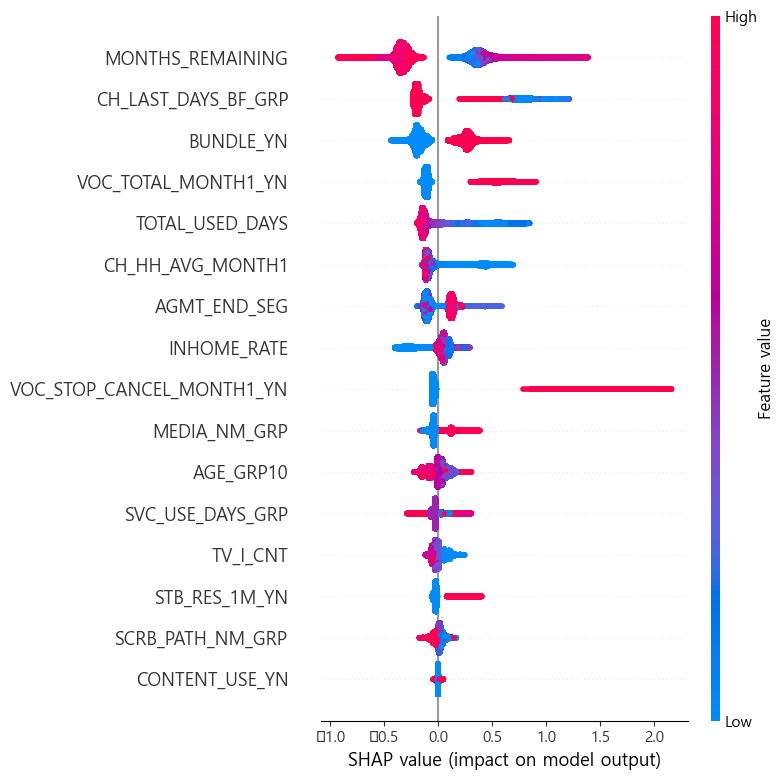

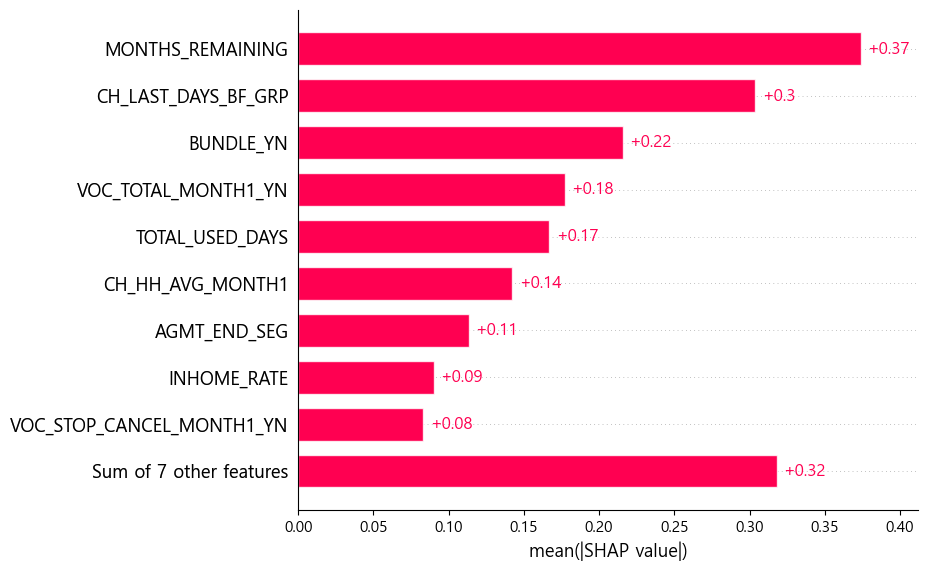

✅ SHAP 분석 완료!


In [30]:
import joblib
import shap
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 샘플링
sample_size = 5000000  # 샘플 크기 설정 (데이터 크기에 맞게 조정 가능)
df_shap_sampled = df_modeling.sample(n=sample_size, random_state=42)

print(f"✅ 데이터 샘플링 완료! (샘플 크기: {len(df_shap_sampled)})")

# SHAP Explainer 최적화 ✅
explainer = shap.TreeExplainer(
    loaded_model,
    data=df_shap_sampled, 
    model_output="margin"
)

# SHAP 값 계산
shap_values = explainer(df_shap_sampled)

print("✅ SHAP 값 계산 완료!")

# SHAP Summary Plot (Feature Importance 시각화)
shap.summary_plot(shap_values, df_shap_sampled)

# Feature 중요도 (막대 그래프)
shap.plots.bar(shap_values)

# 특정 샘플의 예측 과정 해석
shap.plots.force(shap_values[0])
print("✅ SHAP 분석 완료!")

1. `BUNDLE_YN`
- 파란색 (0, 미가입 고객)은 왼쪽 방향에 위치, 빨간색 (1, 가입 고객)은 오른쪽 방향에 위치
- SHAP 값 음수 = 이탈 가능성이 낮아짐
- SHAP 값 양수 = 이탈 가능성이 높아짐
- 번들 미가입 고객은 이탈 가능성이 낮음
- 번들 가입 고객은 **이탈 가능성이 높음**

2. `CH_LAST_DAYS_BF_GRP` 
- 0 : 일주일내 / 1 : 일주일전 / 2 : 2주일전 / 3 : 3주일전 / 4 : 4주일전 / 5 : 3개월내없음
- SHAP 값 음수 = 이탈 가능성이 낮아짐
- SHAP 값 양수 = 이탈 가능성이 높아짐
- Feature의 값이 클수록(=빨간색) 음수 방향에 위치함. 이는 레이블 인코딩을 진행한 4~5의 값이 이탈 가능성이 낮다는 것을 의미.   
즉, 일주일내, 일주일전에서 이탈 가능성이 낮음.
- Feature의 값이 작을수록(=파란색) 양수 방향에 위치함. 이는 레이블 인코딩을 진행한 0~2의 값이 이탈 가능성이 높다는 것을 의미   
**즉, 2주일전, 3개월내없음, 3주일전에서 이탈 가능성이 높음**


3. `TOTAL_USED_DAYS`
- SHAP 값 음수 = 이탈 가능성이 낮아짐
- SHAP 값 양수 = 이탈 가능성이 높아짐
- Feature의 값이 클수록(=빨간색) 음수 방향에 위치함. 이는 총 사용일수가 높은 고객들의 이탈 가능성이 낮다는 것을 의미.   
즉, 충성고객일수록 해지를 하지 않음.
- Feature의 값이 작을수록(=파란색) 양수 방향에 위치함. 이는 총 사용일수가 적은 고객들의 이탈 가능성이 높다는 것을 의미   
**즉, 총 사용일수가 적을수록 해지를 하는 경향을 보임**


4. `MONTH_REMAINING`
- MONTH_REMAINING 컬럼은 -230 ~ 48의 값을 가짐 -> minmax스케일링을 진행함.
- SHAP 값 음수 = 이탈 가능성이 낮아짐
- SHAP 값 양수 = 이탈 가능성이 높아짐
- 남은 개월 수가 0에 가까울수록 즉, shap의 색깔이 파란색일수록 값이 오른쪽에 위치함.<br>즉, **계약이 많이 지났거나, 계약 종료일에 가까운 고객들이 해지를 많이하는 경향을 보임.**
- 남은 개월수가 1에 가까워질수록 shap의 색깔은 빨강색이고, 값이 왼쪽에 더 많이 위치함.<br>즉, **남은 개월수가 많을수록 유지가능성이 높음.**


5. `CH_HH_AVG_MONTH1`
- SHAP 값 음수 = 이탈 가능성이 낮아짐
- SHAP 값 양수 = 이탈 가능성이 높아짐
- TV 시청 시간이 높을수록(빨간색) 왼쪽에 위치함.<br>즉, **TV를 많이 볼수록 유지를 하는 경향을 보임.**
- TV 시청 시간이 적을수록(파란색) 오른쪽에 위치함.<br>즉, **TV를 보지 않을수록 해지를 하는 경향을 보임.** 


### SHAP 분석 값 꺼내기

In [31]:
import joblib

joblib.dump(shap_values, "data/file_pkl/shap_values.pkl")
print("SHAP 값 저장 완료 ✅")

SHAP 값 저장 완료 ✅


### SHAP 분석 값 불러오기

In [32]:
shap_values = joblib.load("data/file_pkl/shap_values.pkl")

print("SHAP 값 불러오기 완료 ✅")

SHAP 값 불러오기 완료 ✅
